In [224]:
import pandas as pd
import numpy as np 

x_train_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3428/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528616087&Signature=sBwuQ1hAsyuzoshn5z3NRT7HoKPCqsUR6Wl2yUpyUG5QVMk%2FNEXaOtfxw9dggZt5PR05ngZrEEr6gR2Mt4Wg0KPHAGU%2Fa5qWQ9DocBo0y6Idafm%2FuXBduK0pBmZI93rTJE%2FuA9UB%2FCcW1lv7eE8qoLkbH9narzj8S3pBk8tD4JOtRiZX9n234ZjsZRCSy9YHAFbLvCFHunpeWdGgDWGKqG5lVd4LxEF8JjSuxPx2LB%2B2e9oT8jBCo%2FHI5y%2F2k8QhBjvSQVAPvGETuWUhvpU2Fnpyem55fes26GuYYM2EFT7OAsDM5cOWSsDYW3potNcFTu5YVhJz%2BPhVYIS0o291Aw%3D%3D'
y_train_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3428/trainLabels.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528616087&Signature=pQJh%2BZxUsE6XDgLiTWMUDV84Ih8o6jUuL5T0cL02qcxEn%2BJk%2FZz66Fh0%2F%2BewmuNK9dHiZkErGkKqrzkZGzi2qmqzb6DAnPsDzKbe%2BKvwYLcgFVSfRW7kv9eCKzZN6qP8%2BxDAmsOJSDtm3mknLwqM1FVdMdqFDr9rAHSsNIECv5%2B%2BBlnMFMHyiDzT8k34wx1PA3z%2BoO9yb1lLss4%2FfkAh6yfll%2FeOREP9yLtaICSDojd2gIXpB9Qqy%2F7FAiCWkKzVeW%2BwJaKeHFQX%2BGyPHJKt%2FCe8QgkWmdT2jdnVCDiDJfBwaX6Wa0OR5RHQ9S%2FzX3JTpqBXtrFkmxzThbXWpLXzWA%3D%3D'
x_test_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3428/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528616129&Signature=ODXti%2FtpJi%2F2QRmrp7eD0x4FlfaGMKUnL%2B%2FW%2FwKSXj7b6JdUrlvzQpkUH1UD6K0MWXrX9BqsuN2TOxM3EAfJI8GD5KGVGR4Ob3XZ1BlOQIuP5lSsYBWceE9uioJ%2FGuUgglsyA59xdbTQeYVcGVyN19U3%2FmdaK3wnv4GDUXdZW5OgIGM9HYJToWUxBIN57OVlG%2Fk%2FZBD%2B3BelAtLL5byD9vM0oaWTxMKoHyjRFbhj8sz%2FSlXxZ29cLYDhytMkTtpd1PxDu7HtWO9UkqhroN3p7TkBC2GbcyGPwde4IefqlUUX0vhXFmgE59Oqlmq%2F%2FrPbszY39TuZLSNlHBTVVFzgrQ%3D%3D'

x_train = pd.read_csv(x_train_url, header=None)
y_train = pd.read_csv(y_train_url, header=None)
x_test = pd.read_csv(x_test_url, header=None)

from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score

def preprocessingX(input_df):
    r = RobustScaler().fit_transform(input_df)
    r = MinMaxScaler().fit_transform(r)
    #r = PCA(n_components=3).fit_transform(r)
    return r

x_train_v = preprocessingX(x_train)

rf_grid = GridSearchCV(RandomForestClassifier(), {'n_estimators':[100], 
                                            'max_depth':[5, 10, 13], 
                                            'min_samples_split': [2, 5, 10], 
                                            'random_state':[42],
                                           }, cv=10, scoring='accuracy')
rf_grid.fit(x_train_v, y_train.values.ravel())

#knn_grid = GridSearchCV(KNeighborsClassifier(), {'n_neighbors':[30, 50]}, cv=10, scoring='accuracy')
#knn_grid.fit(x_train_v, y_train.values.ravel())

rf_best = rf_grid.best_estimator_
#knn_best = knn_grid.best_estimator_

print('----')
for m in [rf_best]:
    # y 가 2차원 어레이일 때 문제가 생겨서, ravel로 수정해줌
    print(m.__class__)
    print("train: {}".format(m.score(x_train_v, y_train.values.ravel())))
    print("----")

print( cross_val_score(rf_best, x_train_v, y_train.values.ravel(),cv=10,scoring='accuracy') )
#print( cross_val_score(knn_best, x_train_v, y_train.values.ravel(),cv=10,scoring='accuracy') )

"""
submit_df 만들기
"""
submit_df = pd.DataFrame({'Id':range(1,1+len(x_test)), 
              'Solution':rf_best.predict(preprocessingX(x_test))
             })
submit_df.to_csv('180607_ds_london.csv', index=False)    
print("complete")


----
<class 'sklearn.ensemble.forest.RandomForestClassifier'>
train: 1.0
----
[ 0.88  0.86  0.89  0.88  0.83  0.88  0.9   0.88  0.86  0.85]
complete


In [252]:
"""
- MLPclasffieir로 한번 해보면 좋을 것 같다. 
- 
"""

import pandas as pd
import numpy as np 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, train_test_split

x_train_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3428/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528616087&Signature=sBwuQ1hAsyuzoshn5z3NRT7HoKPCqsUR6Wl2yUpyUG5QVMk%2FNEXaOtfxw9dggZt5PR05ngZrEEr6gR2Mt4Wg0KPHAGU%2Fa5qWQ9DocBo0y6Idafm%2FuXBduK0pBmZI93rTJE%2FuA9UB%2FCcW1lv7eE8qoLkbH9narzj8S3pBk8tD4JOtRiZX9n234ZjsZRCSy9YHAFbLvCFHunpeWdGgDWGKqG5lVd4LxEF8JjSuxPx2LB%2B2e9oT8jBCo%2FHI5y%2F2k8QhBjvSQVAPvGETuWUhvpU2Fnpyem55fes26GuYYM2EFT7OAsDM5cOWSsDYW3potNcFTu5YVhJz%2BPhVYIS0o291Aw%3D%3D'
y_train_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3428/trainLabels.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528616087&Signature=pQJh%2BZxUsE6XDgLiTWMUDV84Ih8o6jUuL5T0cL02qcxEn%2BJk%2FZz66Fh0%2F%2BewmuNK9dHiZkErGkKqrzkZGzi2qmqzb6DAnPsDzKbe%2BKvwYLcgFVSfRW7kv9eCKzZN6qP8%2BxDAmsOJSDtm3mknLwqM1FVdMdqFDr9rAHSsNIECv5%2B%2BBlnMFMHyiDzT8k34wx1PA3z%2BoO9yb1lLss4%2FfkAh6yfll%2FeOREP9yLtaICSDojd2gIXpB9Qqy%2F7FAiCWkKzVeW%2BwJaKeHFQX%2BGyPHJKt%2FCe8QgkWmdT2jdnVCDiDJfBwaX6Wa0OR5RHQ9S%2FzX3JTpqBXtrFkmxzThbXWpLXzWA%3D%3D'
x_test_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3428/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528616129&Signature=ODXti%2FtpJi%2F2QRmrp7eD0x4FlfaGMKUnL%2B%2FW%2FwKSXj7b6JdUrlvzQpkUH1UD6K0MWXrX9BqsuN2TOxM3EAfJI8GD5KGVGR4Ob3XZ1BlOQIuP5lSsYBWceE9uioJ%2FGuUgglsyA59xdbTQeYVcGVyN19U3%2FmdaK3wnv4GDUXdZW5OgIGM9HYJToWUxBIN57OVlG%2Fk%2FZBD%2B3BelAtLL5byD9vM0oaWTxMKoHyjRFbhj8sz%2FSlXxZ29cLYDhytMkTtpd1PxDu7HtWO9UkqhroN3p7TkBC2GbcyGPwde4IefqlUUX0vhXFmgE59Oqlmq%2F%2FrPbszY39TuZLSNlHBTVVFzgrQ%3D%3D'

x_train = pd.read_csv(x_train_url, header=None)
y_train = pd.read_csv(y_train_url, header=None)
x_test = pd.read_csv(x_test_url, header=None)

x_train_v = x_train.values

x_train_train, x_train_test, y_train_train, y_train_test = train_test_split(x_train_v, y_train, 
                                                                            train_size=0.6, 
                                                                            test_size=0.4, 
                                                                            random_state=42
                                                                           )

models = [
    MLPClassifier(hidden_layer_sizes=[64, 32, 4], max_iter=5000, random_state=42), 
    MLPClassifier(hidden_layer_sizes=[2048, 512, 128], max_iter=5000, random_state=42), 
    MLPClassifier(hidden_layer_sizes=[8192, 2048, 128], max_iter=5000, random_state=42), 
    MLPClassifier(hidden_layer_sizes=[4092, 512, 64], max_iter=5000, random_state=42, verbose=False), 
    MLPClassifier(hidden_layer_sizes=[2048, 512, 128, 32, 16], max_iter=5000, random_state=42, verbose=False, tol=0.000001), 
    MLPClassifier(hidden_layer_sizes=[8192, 4096, 2048, 512, 128, 32, 16], max_iter=5000, random_state=42, verbose=True, tol=0.000001), 
    #MLPClassifier(hidden_layer_sizes=[4092*2, 512*2, 64*2], max_iter=5000, random_state=42, verbose=True), 
    #MLPClassifier(hidden_layer_sizes=[64, 32, 4], max_iter=5000, alpha=0.05), 
    #MLPClassifier(hidden_layer_sizes=[64, 32, 4], max_iter=5000, alpha=0.5), 
    #MLPClassifier(hidden_layer_sizes=[2048, 128, 4], max_iter=5000, alpha=0.05),
]

for m in models:
    # y 가 2차원 어레이일 때 문제가 생겨서, ravel로 수정해줌
    print(m.__class__)
    m.fit(x_train_train, y_train_train.values.ravel())
    print("train: {}".format(m.score(x_train_train, y_train_train.values.ravel())))
    print("test: {}".format(m.score(x_train_test, y_train_test.values.ravel())))
    #print(cross_val_score(m, x_train_train, y_train_train.values.ravel(),cv=10,scoring='accuracy'))
    print("----")

best_model = sorted(models, key=lambda m: m.score(x_train_test, y_train_test.values.ravel()), reverse=True)[0]

submit_df = pd.DataFrame({'Id':range(1,1+len(x_test)), 
              'Solution':best_model.predict(x_test.values)
             })
submit_df.to_csv('180607_ds_london.csv', index=False)    
print("complete")

<class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>
train: 0.9983333333333333
test: 0.87
----
<class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>
train: 1.0
test: 0.8925
----
<class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>
train: 1.0
test: 0.885
----
<class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>
train: 1.0
test: 0.885
----
<class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>
train: 1.0
test: 0.89
----
<class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>
Iteration 1, loss = 0.63504406
Iteration 2, loss = 1.02627232
Iteration 3, loss = 0.58636568
Iteration 4, loss = 0.39818701
Iteration 5, loss = 0.36976756
Iteration 6, loss = 0.29988947
Iteration 7, loss = 0.25247464
Iteration 8, loss = 0.21701859
Iteration 9, loss = 0.16716805
Iteration 10, loss = 0.12269334
Iteration 11, loss = 0.08120724
Iteration 12, loss = 0.05184766
Iteration 13, loss = 0.03686217
Iteration 14, loss = 0.02

In [304]:
"""
이제 keras로 해보자!!
"""


"""
- MLPclasffieir로 한번 해보면 좋을 것 같다. 
- 
"""

import pandas as pd
import numpy as np 
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, Flatten, MaxPooling2D
from keras.optimizers import SGD, Adam
from keras import metrics

x_train_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3428/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528616087&Signature=sBwuQ1hAsyuzoshn5z3NRT7HoKPCqsUR6Wl2yUpyUG5QVMk%2FNEXaOtfxw9dggZt5PR05ngZrEEr6gR2Mt4Wg0KPHAGU%2Fa5qWQ9DocBo0y6Idafm%2FuXBduK0pBmZI93rTJE%2FuA9UB%2FCcW1lv7eE8qoLkbH9narzj8S3pBk8tD4JOtRiZX9n234ZjsZRCSy9YHAFbLvCFHunpeWdGgDWGKqG5lVd4LxEF8JjSuxPx2LB%2B2e9oT8jBCo%2FHI5y%2F2k8QhBjvSQVAPvGETuWUhvpU2Fnpyem55fes26GuYYM2EFT7OAsDM5cOWSsDYW3potNcFTu5YVhJz%2BPhVYIS0o291Aw%3D%3D'
y_train_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3428/trainLabels.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528616087&Signature=pQJh%2BZxUsE6XDgLiTWMUDV84Ih8o6jUuL5T0cL02qcxEn%2BJk%2FZz66Fh0%2F%2BewmuNK9dHiZkErGkKqrzkZGzi2qmqzb6DAnPsDzKbe%2BKvwYLcgFVSfRW7kv9eCKzZN6qP8%2BxDAmsOJSDtm3mknLwqM1FVdMdqFDr9rAHSsNIECv5%2B%2BBlnMFMHyiDzT8k34wx1PA3z%2BoO9yb1lLss4%2FfkAh6yfll%2FeOREP9yLtaICSDojd2gIXpB9Qqy%2F7FAiCWkKzVeW%2BwJaKeHFQX%2BGyPHJKt%2FCe8QgkWmdT2jdnVCDiDJfBwaX6Wa0OR5RHQ9S%2FzX3JTpqBXtrFkmxzThbXWpLXzWA%3D%3D'
x_test_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3428/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528616129&Signature=ODXti%2FtpJi%2F2QRmrp7eD0x4FlfaGMKUnL%2B%2FW%2FwKSXj7b6JdUrlvzQpkUH1UD6K0MWXrX9BqsuN2TOxM3EAfJI8GD5KGVGR4Ob3XZ1BlOQIuP5lSsYBWceE9uioJ%2FGuUgglsyA59xdbTQeYVcGVyN19U3%2FmdaK3wnv4GDUXdZW5OgIGM9HYJToWUxBIN57OVlG%2Fk%2FZBD%2B3BelAtLL5byD9vM0oaWTxMKoHyjRFbhj8sz%2FSlXxZ29cLYDhytMkTtpd1PxDu7HtWO9UkqhroN3p7TkBC2GbcyGPwde4IefqlUUX0vhXFmgE59Oqlmq%2F%2FrPbszY39TuZLSNlHBTVVFzgrQ%3D%3D'

x_train = pd.read_csv(x_train_url, header=None)
y_train = pd.read_csv(y_train_url, header=None)
x_test = pd.read_csv(x_test_url, header=None)

In [348]:
x_train_v = x_train.values
x_train_train, x_train_test, y_train_train, y_train_test = train_test_split(x_train_v, y_train, 
                                                                            train_size=0.6, 
                                                                            test_size=0.4, 
                                                                            random_state=42
                                                                           )

model = Sequential([
    Dense(4096, kernel_initializer='normal', activation = "relu", input_shape=(40, )), 
    Dropout(0.5), 
    Dense(2048, kernel_initializer='normal', activation = "relu"),
    Dropout(0.5), 
    Dense(512, kernel_initializer='normal', activation = "relu"),
    Dropout(0.5), 
    Dense(256, kernel_initializer='normal', activation = "relu"),
    Dropout(0.5),
    Dense(64, kernel_initializer='normal', activation = "relu"),
    Dense(32, kernel_initializer='normal', activation = "relu"),
    Dense(16, kernel_initializer='normal', activation = "relu"),
    Dropout(0.5),
    Dense(8, kernel_initializer='normal', activation = "relu"),
    Dense(1, kernel_initializer='normal', activation = "sigmoid"), 
])

model.compile(loss='binary_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8), 
              metrics=[metrics.binary_accuracy, metrics.binary_crossentropy])

train_history = model.fit(x_train_train, y_train_train.values, epochs=30, batch_size=200, verbose=1)

y_train_train_pred = (model.predict(x_train_train) > 0.5).astype('int64')
y_train_test_pred = (model.predict(x_train_test) > 0.5).astype('int64')

print("train: {}, test: {}".format(
    accuracy_score( y_train_train.values, y_train_train_pred.astype("int64")), 
    accuracy_score( y_train_test.values, y_train_test_pred.astype("int64"))
))

submit_df = pd.DataFrame({'Id':range(1,1+len(x_test)), 
              'Solution':(model.predict(x_test.values) > 0.5).astype('int64').ravel()
             })
submit_df.to_csv('180607_ds_london.csv', index=False)    
print("complete")

Epoch 1/30
600/600 [==============================] - 5s - loss: 0.6931 - binary_accuracy: 0.5150 - binary_crossentropy: 0.6931     
Epoch 2/30
600/600 [==============================] - 3s - loss: 0.6926 - binary_accuracy: 0.5600 - binary_crossentropy: 0.6926     
Epoch 3/30
600/600 [==============================] - 2s - loss: 0.6903 - binary_accuracy: 0.5250 - binary_crossentropy: 0.6903     
Epoch 4/30
600/600 [==============================] - 2s - loss: 0.6785 - binary_accuracy: 0.5033 - binary_crossentropy: 0.6785     
Epoch 5/30
600/600 [==============================] - 2s - loss: 0.6453 - binary_accuracy: 0.5117 - binary_crossentropy: 0.6453     
Epoch 6/30
600/600 [==============================] - 2s - loss: 0.6151 - binary_accuracy: 0.5483 - binary_crossentropy: 0.6151     
Epoch 7/30
600/600 [==============================] - 2s - loss: 0.5953 - binary_accuracy: 0.7367 - binary_crossentropy: 0.5953     
Epoch 8/30
600/600 [==============================] - 1s - loss: 0.55

In [349]:
x_train_v = x_train.values
x_train_train, x_train_test, y_train_train, y_train_test = train_test_split(x_train_v, y_train, 
                                                                            train_size=0.6, 
                                                                            test_size=0.4, 
                                                                            random_state=42
                                                                           )

model = Sequential([
    Dense(4096, kernel_initializer='normal', activation = "relu", input_shape=(40, )), 
    Dropout(0.8), 
    Dense(2048, kernel_initializer='normal', activation = "relu"),
    Dropout(0.5), 
    Dense(1024, kernel_initializer='normal', activation = "relu"),
    Dropout(0.5), 
    Dense(512, kernel_initializer='normal', activation = "relu"),
    Dropout(0.5), 
    Dense(256, kernel_initializer='normal', activation = "relu"),
    Dropout(0.5),
    Dense(64, kernel_initializer='normal', activation = "relu"),
    Dense(32, kernel_initializer='normal', activation = "relu"),
    Dense(16, kernel_initializer='normal', activation = "relu"),
    Dropout(0.5),
    Dense(8, kernel_initializer='normal', activation = "relu"),
    Dense(1, kernel_initializer='normal', activation = "sigmoid"), 
])

model.compile(loss='binary_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8), 
              metrics=[metrics.binary_accuracy, metrics.binary_crossentropy])

train_history = model.fit(x_train_train, y_train_train.values, epochs=50, batch_size=200, verbose=1)

y_train_train_pred = (model.predict(x_train_train) > 0.5).astype('int64')
y_train_test_pred = (model.predict(x_train_test) > 0.5).astype('int64')

print("train: {}, test: {}".format(
    accuracy_score( y_train_train.values, y_train_train_pred.astype("int64")), 
    accuracy_score( y_train_test.values, y_train_test_pred.astype("int64"))
))

submit_df = pd.DataFrame({'Id':range(1,1+len(x_test)), 
              'Solution':(model.predict(x_test.values) > 0.5).astype('int64').ravel()
             })
submit_df.to_csv('180607_ds_london.csv', index=False)    
print("complete")

Epoch 1/30
600/600 [==============================] - 4s - loss: 0.6932 - binary_accuracy: 0.5067 - binary_crossentropy: 0.6932     
Epoch 2/30
600/600 [==============================] - 2s - loss: 0.6929 - binary_accuracy: 0.5233 - binary_crossentropy: 0.6929     
Epoch 3/30
600/600 [==============================] - 2s - loss: 0.6928 - binary_accuracy: 0.5067 - binary_crossentropy: 0.6928     
Epoch 4/30
600/600 [==============================] - 1s - loss: 0.6924 - binary_accuracy: 0.5133 - binary_crossentropy: 0.6924     
Epoch 5/30
600/600 [==============================] - 1s - loss: 0.6902 - binary_accuracy: 0.4883 - binary_crossentropy: 0.6902     
Epoch 6/30
600/600 [==============================] - 2s - loss: 0.6819 - binary_accuracy: 0.5017 - binary_crossentropy: 0.6819     
Epoch 7/30
600/600 [==============================] - 2s - loss: 0.6612 - binary_accuracy: 0.5033 - binary_crossentropy: 0.6612     
Epoch 8/30
600/600 [==============================] - 2s - loss: 0.63

train: 0.9516666666666667, test: 0.9775
complete


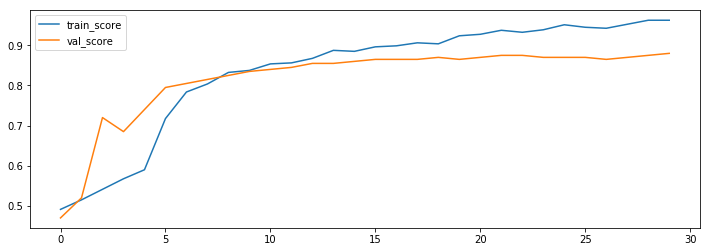

In [372]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, Flatten, MaxPooling2D
from keras.optimizers import SGD, Adam
from keras import metrics

x_train = pd.read_csv(x_train_url, header=None)
y_train = pd.read_csv(y_train_url, header=None)
x_test = pd.read_csv(x_test_url, header=None)

x_train_v = x_train.values
x_train_train, x_train_test, y_train_train, y_train_test = train_test_split(x_train_v, y_train, 
                                                                            train_size=0.6, 
                                                                            test_size=0.4, 
                                                                            random_state=42
                                                                           )

model = Sequential([
    Dense(256, kernel_initializer='normal', activation = "relu", input_shape=(40, )), 
    Dropout(0.5), 
    Dense(1024, kernel_initializer='normal', activation = "relu"),
    Dropout(0.5), 
    Dense(2048, kernel_initializer='normal', activation = "relu"),
    Dropout(0.5), 
    Dense(512, kernel_initializer='normal', activation = "relu"),
    Dropout(0.5), 
    Dense(256, kernel_initializer='normal', activation = "relu"),
    Dropout(0.5),
    Dense(64, kernel_initializer='normal', activation = "relu"),
    Dropout(0.5),
    Dense(16, kernel_initializer='normal', activation = "relu"),
    Dense(1, kernel_initializer='normal', activation = "sigmoid"), 
])

model.compile(loss='binary_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8), 
              metrics=[metrics.binary_accuracy, metrics.binary_crossentropy])

train_history = model.fit(x_train_v, y_train.values, epochs=30, 
                          batch_size=200, verbose=0, validation_split=0.2)

y_train_train_pred = (model.predict(x_train_train) > 0.5).astype('int64')
y_train_test_pred = (model.predict(x_train_test) > 0.5).astype('int64')

print("train: {}, test: {}".format(
    accuracy_score( y_train_train.values, y_train_train_pred.astype("int64")), 
    accuracy_score( y_train_test.values, y_train_test_pred.astype("int64"))
))

submit_df = pd.DataFrame({'Id':range(1,1+len(x_test)), 
              'Solution':(model.predict(x_test.values) > 0.5).astype('int64').ravel()
             })
submit_df.to_csv('180607_ds_london.csv', index=False)    
print("complete")

train_history.history.keys()

x = range(0, len(train_history.history['val_loss']))
train_binary_accuracy_lst = train_history.history['binary_accuracy']
val_binary_accuracy_lst = train_history.history['val_binary_accuracy']

plt.figure(figsize=(12, 4))
plt.plot(x, train_binary_accuracy_lst, label='train_score')
plt.plot(val_binary_accuracy_lst, label='val_score')
plt.legend()
plt.savefig("../../assets/images/markdown_img/180608_1224_keras_train_val_score_plot.svg")
plt.show()

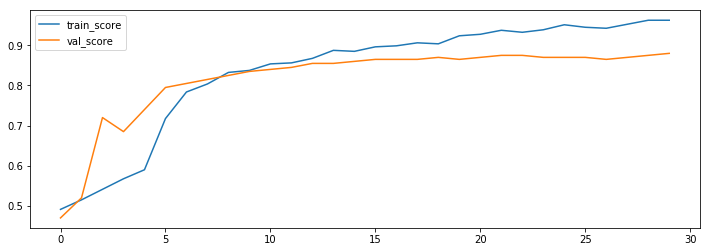

In [374]:
plt.figure(figsize=(12, 4))
plt.plot(x, train_binary_accuracy_lst, label='train_score')
plt.plot(val_binary_accuracy_lst, label='val_score')
plt.legend()
plt.savefig("../../assets/images/markdown_img/180608_1224_keras_train_val_score_plot.svg")
plt.show()

In [375]:
import pandas as pd
import numpy as np 

x_train_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3428/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528616087&Signature=sBwuQ1hAsyuzoshn5z3NRT7HoKPCqsUR6Wl2yUpyUG5QVMk%2FNEXaOtfxw9dggZt5PR05ngZrEEr6gR2Mt4Wg0KPHAGU%2Fa5qWQ9DocBo0y6Idafm%2FuXBduK0pBmZI93rTJE%2FuA9UB%2FCcW1lv7eE8qoLkbH9narzj8S3pBk8tD4JOtRiZX9n234ZjsZRCSy9YHAFbLvCFHunpeWdGgDWGKqG5lVd4LxEF8JjSuxPx2LB%2B2e9oT8jBCo%2FHI5y%2F2k8QhBjvSQVAPvGETuWUhvpU2Fnpyem55fes26GuYYM2EFT7OAsDM5cOWSsDYW3potNcFTu5YVhJz%2BPhVYIS0o291Aw%3D%3D'
y_train_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3428/trainLabels.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528616087&Signature=pQJh%2BZxUsE6XDgLiTWMUDV84Ih8o6jUuL5T0cL02qcxEn%2BJk%2FZz66Fh0%2F%2BewmuNK9dHiZkErGkKqrzkZGzi2qmqzb6DAnPsDzKbe%2BKvwYLcgFVSfRW7kv9eCKzZN6qP8%2BxDAmsOJSDtm3mknLwqM1FVdMdqFDr9rAHSsNIECv5%2B%2BBlnMFMHyiDzT8k34wx1PA3z%2BoO9yb1lLss4%2FfkAh6yfll%2FeOREP9yLtaICSDojd2gIXpB9Qqy%2F7FAiCWkKzVeW%2BwJaKeHFQX%2BGyPHJKt%2FCe8QgkWmdT2jdnVCDiDJfBwaX6Wa0OR5RHQ9S%2FzX3JTpqBXtrFkmxzThbXWpLXzWA%3D%3D'
x_test_url = 'https://storage.googleapis.com/kaggle-competitions-data/kaggle/3428/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1528616129&Signature=ODXti%2FtpJi%2F2QRmrp7eD0x4FlfaGMKUnL%2B%2FW%2FwKSXj7b6JdUrlvzQpkUH1UD6K0MWXrX9BqsuN2TOxM3EAfJI8GD5KGVGR4Ob3XZ1BlOQIuP5lSsYBWceE9uioJ%2FGuUgglsyA59xdbTQeYVcGVyN19U3%2FmdaK3wnv4GDUXdZW5OgIGM9HYJToWUxBIN57OVlG%2Fk%2FZBD%2B3BelAtLL5byD9vM0oaWTxMKoHyjRFbhj8sz%2FSlXxZ29cLYDhytMkTtpd1PxDu7HtWO9UkqhroN3p7TkBC2GbcyGPwde4IefqlUUX0vhXFmgE59Oqlmq%2F%2FrPbszY39TuZLSNlHBTVVFzgrQ%3D%3D'

x_train = pd.read_csv(x_train_url, header=None)
y_train = pd.read_csv(y_train_url, header=None)
x_test = pd.read_csv(x_test_url, header=None)

train: 0.9716666666666667, test: 0.9875
complete


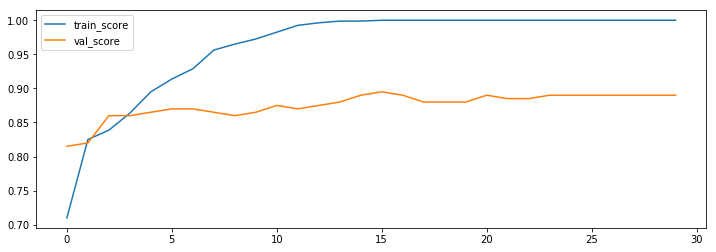

In [380]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, Flatten, MaxPooling2D
from keras.optimizers import SGD, Adam
from keras import metrics


x_train_v = x_train.values
x_train_train, x_train_test, y_train_train, y_train_test = train_test_split(x_train_v, y_train, 
                                                                            train_size=0.6, 
                                                                            test_size=0.4, 
                                                                            random_state=42
                                                                           )

model = Sequential([
    Dense(256, kernel_initializer='normal', activation = "relu", input_shape=(40, )), 
    Dense(512, kernel_initializer='normal', activation = "relu"),
    Dense(2048, kernel_initializer='normal', activation = "relu"),
    Dense(64, kernel_initializer='normal', activation = "relu"),
    Dense(16, kernel_initializer='normal', activation = "relu"),
    Dense(1, kernel_initializer='normal', activation = "sigmoid"), 
])

model.compile(loss='binary_crossentropy', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8), 
              metrics=[metrics.binary_accuracy, metrics.binary_crossentropy])

train_history = model.fit(x_train_v, y_train.values, epochs=30, 
                          batch_size=200, verbose=0, validation_split=0.2)

y_train_train_pred = (model.predict(x_train_train) > 0.5).astype('int64')
y_train_test_pred = (model.predict(x_train_test) > 0.5).astype('int64')

print("train: {}, test: {}".format(
    accuracy_score( y_train_train.values, y_train_train_pred.astype("int64")), 
    accuracy_score( y_train_test.values, y_train_test_pred.astype("int64"))
))

submit_df = pd.DataFrame({'Id':range(1,1+len(x_test)), 
              'Solution':(model.predict(x_test.values) > 0.5).astype('int64').ravel()
             })
submit_df.to_csv('180607_ds_london.csv', index=False)    
print("complete")

train_history.history.keys()

x = range(0, len(train_history.history['val_loss']))
train_binary_accuracy_lst = train_history.history['binary_accuracy']
val_binary_accuracy_lst = train_history.history['val_binary_accuracy']

plt.figure(figsize=(12, 4))
plt.plot(x, train_binary_accuracy_lst, label='train_score')
plt.plot(val_binary_accuracy_lst, label='val_score')
plt.legend()
#plt.savefig("../../assets/images/markdown_img/180608_1224_keras_train_val_score_plot.svg")
plt.show()

Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 6s - loss: 296877108.9600 - mean_squared_error: 296877108.9600 - val_loss: 273074572.8000 - val_mean_squared_error: 273074572.8000
Epoch 2/10
1600/1600 [==============================] - 0s - loss: 296869860.1600 - mean_squared_error: 296869860.1600 - val_loss: 273072834.5600 - val_mean_squared_error: 273072834.5600
Epoch 3/10
1600/1600 [==============================] - 0s - loss: 296869579.3600 - mean_squared_error: 296869579.3600 - val_loss: 273072820.4800 - val_mean_squared_error: 273072820.4800
Epoch 4/10
1600/1600 [==============================] - 0s - loss: 296869570.5600 - mean_squared_error: 296869570.5600 - val_loss: 273072816.0000 - val_mean_squared_error: 273072816.0000
Epoch 5/10
1600/1600 [==============================] - 0s - loss: 296869564.8000 - mean_squared_error: 296869564.8000 - val_loss: 273072815.3600 - val_mean_squared_error: 273072815.3600
Epoch 6/10
1600/16

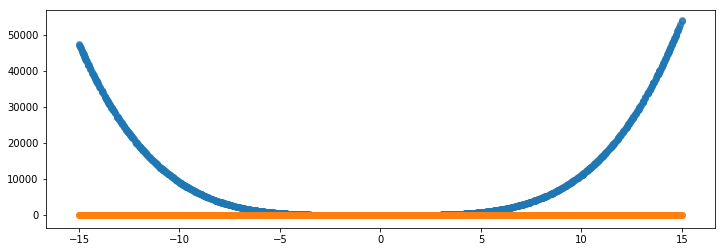

In [392]:
import numpy as np 
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam
from keras import metrics

from sklearn.metrics import r2_score

sample_size = 2000 

x = np.random.uniform(-15, 15, sample_size)
y = x**4 + x**3 + x**2 + x + np.random.normal(0, 10, sample_size)

model = Sequential([
    Dense(32, kernel_initializer='normal', activation = "relu", input_shape=(1,)), 
    Dense(64, kernel_initializer='normal', activation = "relu"),
    Dense(32, kernel_initializer='normal', activation = "relu"),
    Dense(1, kernel_initializer='normal', activation = "sigmoid"), 
])

model.compile(loss='mean_squared_error', 
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8), 
              metrics=[metrics.mse])
train_history = model.fit(x, y, validation_split=0.2)

print(r2_score(y, model.predict(x)))
plt.figure(figsize=(12, 4))
plt.scatter(x, y, alpha=0.5)
plt.scatter(x, model.predict(x), alpha=0.5)
plt.show()